# 반려견 안구질환 진단 예측 프로젝트 - 두부는 단단

In [2]:
# 라이브러리 임포트
import os
import glob
import json
import pandas as pd

In [4]:
# 데이터프레임 생성
df = pd.DataFrame(columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "path", "img_path"])

# 디렉토리 경로
directory_paths = [r"D:\반려동물 안구질환 데이터\1.Training\안검종양"]

# 빈 리스트 생성
data_list = []

# 디렉토리 내 JSON 파일 읽기
for directory_path in directory_paths:
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                json_data = json.load(file)

                # 데이터프레임 생성을 위한 정보 추출
                breed = json_data["images"]["meta"]["breed"]
                age = json_data["images"]["meta"]["age"]
                gender = json_data["images"]["meta"]["gender"]
                eye_position = json_data["images"]["meta"]["eye_position"]
                lesions = json_data["label"]["label_disease_nm"]
                label_disease_lv_1 = json_data["label"]["label_disease_lv_1"]
                label_disease_lv_2 = json_data["label"]["label_disease_lv_2"]
                label_disease_lv_3 = json_data["label"]["label_disease_lv_3"]
                img_path = os.path.join(directory_path, json_data["label"]["label_filename"])

                # 데이터 리스트에 추가
                data_list.append([breed, age, gender, eye_position, lesions, label_disease_lv_1, label_disease_lv_2, label_disease_lv_3, img_path])

In [5]:
# 데이터프레임 생성
df = pd.DataFrame(data_list, columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "img_path"])
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path
0,요크셔 테리어,16.0,0.0,왼쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_030b3...
1,포메라니안,4.0,0.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04133...
2,비숑 프리제,1.0,1.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04172...
3,말티즈,0.0,1.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04499...
4,포메라니안,5.0,1.0,왼쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_05bdf...
...,...,...,...,...,...,...,...,...,...
9605,시츄,14.0,0.0,왼쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3b103...
9606,시츄,14.0,1.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3d8b3...
9607,시츄,14.0,1.0,오른쪽눈,안검종양,무,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db32...
9608,시츄,11.0,1.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db41...


In [6]:
df.shape

(9610, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               9610 non-null   object 
 1   age                 9610 non-null   float64
 2   gender              9610 non-null   float64
 3   eye_position        9610 non-null   object 
 4   lesions             9610 non-null   object 
 5   label_disease_lv_1  9610 non-null   object 
 6   label_disease_lv_2  9610 non-null   object 
 7   label_disease_lv_3  9610 non-null   object 
 8   img_path            9610 non-null   object 
dtypes: float64(2), object(7)
memory usage: 675.8+ KB


In [8]:
# 이미지 데이터 시각화
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 확장자 없는 애 찾기
img_path_list = list(df['img_path'])

no_file=0
for idx, img_path in enumerate(img_path_list):
    if os.path.exists(img_path):
        pass
        # print(f"File exists: {img_path}")
    else:
        print(idx)
        no_file += 1
        print(f"File does not exist: {img_path}")
        
print(no_file)

5109
File does not exist: D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D39_0dd1859c-60a5-11ec-8402-0a7404972c70
1


In [11]:
# # 확장자 없는 파일에 확장자 추가
df['img_path'][5109] = df['img_path'][5109]+'.jpg'

C:\Users\asiae\AppData\Local\Temp\ipykernel_15392\915554443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['img_path'][5109] = df['img_path'][5109]+'.jpg'


In [12]:
# 이미지 데이터 사이즈 변경
import numpy as np
df['image_pixel'] = df['img_path'].map(lambda x: np.asarray(Image.open(x).resize((50, 50))))

In [13]:
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path,image_pixel
0,요크셔 테리어,16.0,0.0,왼쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_030b3...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,포메라니안,4.0,0.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04133...,"[[[106, 101, 77], [105, 99, 76], [111, 106, 83..."
2,비숑 프리제,1.0,1.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04172...,"[[[195, 190, 178], [196, 193, 181], [200, 197,..."
3,말티즈,0.0,1.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04499...,"[[[168, 169, 164], [162, 162, 157], [160, 159,..."
4,포메라니안,5.0,1.0,왼쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_05bdf...,"[[[9, 18, 9], [9, 19, 10], [25, 31, 23], [43, ..."
...,...,...,...,...,...,...,...,...,...,...
9605,시츄,14.0,0.0,왼쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3b103...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9606,시츄,14.0,1.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3d8b3...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9607,시츄,14.0,1.0,오른쪽눈,안검종양,무,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db32...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
9608,시츄,11.0,1.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db41...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


## 전처리

### 눈 위치 인덱싱

In [14]:
df['eye_position'].unique()

array(['왼쪽눈', '오른쪽눈'], dtype=object)

In [15]:
# Dictionary mapping eye_position values to numeric representations
eye_position_mapping = {
    '왼쪽눈': 0,
    '오른쪽눈': 1
}

# Replace eye_position values with numeric representations
df['eye_position'] = df['eye_position'].map(eye_position_mapping)

# Print unique numeric representations
print(df['eye_position'].unique())


[0 1]


### 성별, 나이 정수형

In [16]:
df['age'] = df['age'].astype(int)
df['gender'] = df['gender'].astype(int)

### 증상 무:0 유:1

In [17]:
# Define a function to map values to 0 or 1
def map_to_binary(value):
    return 0 if value == '무' else 1

# Apply the function to the specified columns
columns_to_map = ['label_disease_lv_1', 'label_disease_lv_2', 'label_disease_lv_3']
for column in columns_to_map:
    df[column] = df[column].apply(lambda x: map_to_binary(x))

# Print unique values to verify the transformation
for column in columns_to_map:
    print(df[column].unique())


[1 0]
[1 0]
[1 0]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   breed               9610 non-null   object
 1   age                 9610 non-null   int32 
 2   gender              9610 non-null   int32 
 3   eye_position        9610 non-null   int64 
 4   lesions             9610 non-null   object
 5   label_disease_lv_1  9610 non-null   int64 
 6   label_disease_lv_2  9610 non-null   int64 
 7   label_disease_lv_3  9610 non-null   int64 
 8   img_path            9610 non-null   object
 9   image_pixel         9610 non-null   object
dtypes: int32(2), int64(4), object(4)
memory usage: 675.8+ KB


#### 하나라도 유증상이면 1

In [19]:
def check_disease_presence(row):
    if row['label_disease_lv_1'] == 0 and row['label_disease_lv_2'] == 0 and row['label_disease_lv_3'] == 0:
        return 0
    else:
        return 1

df['path'] = df.apply(check_disease_presence, axis=1)

print(df['path'].unique())

[1 0]


## EDA

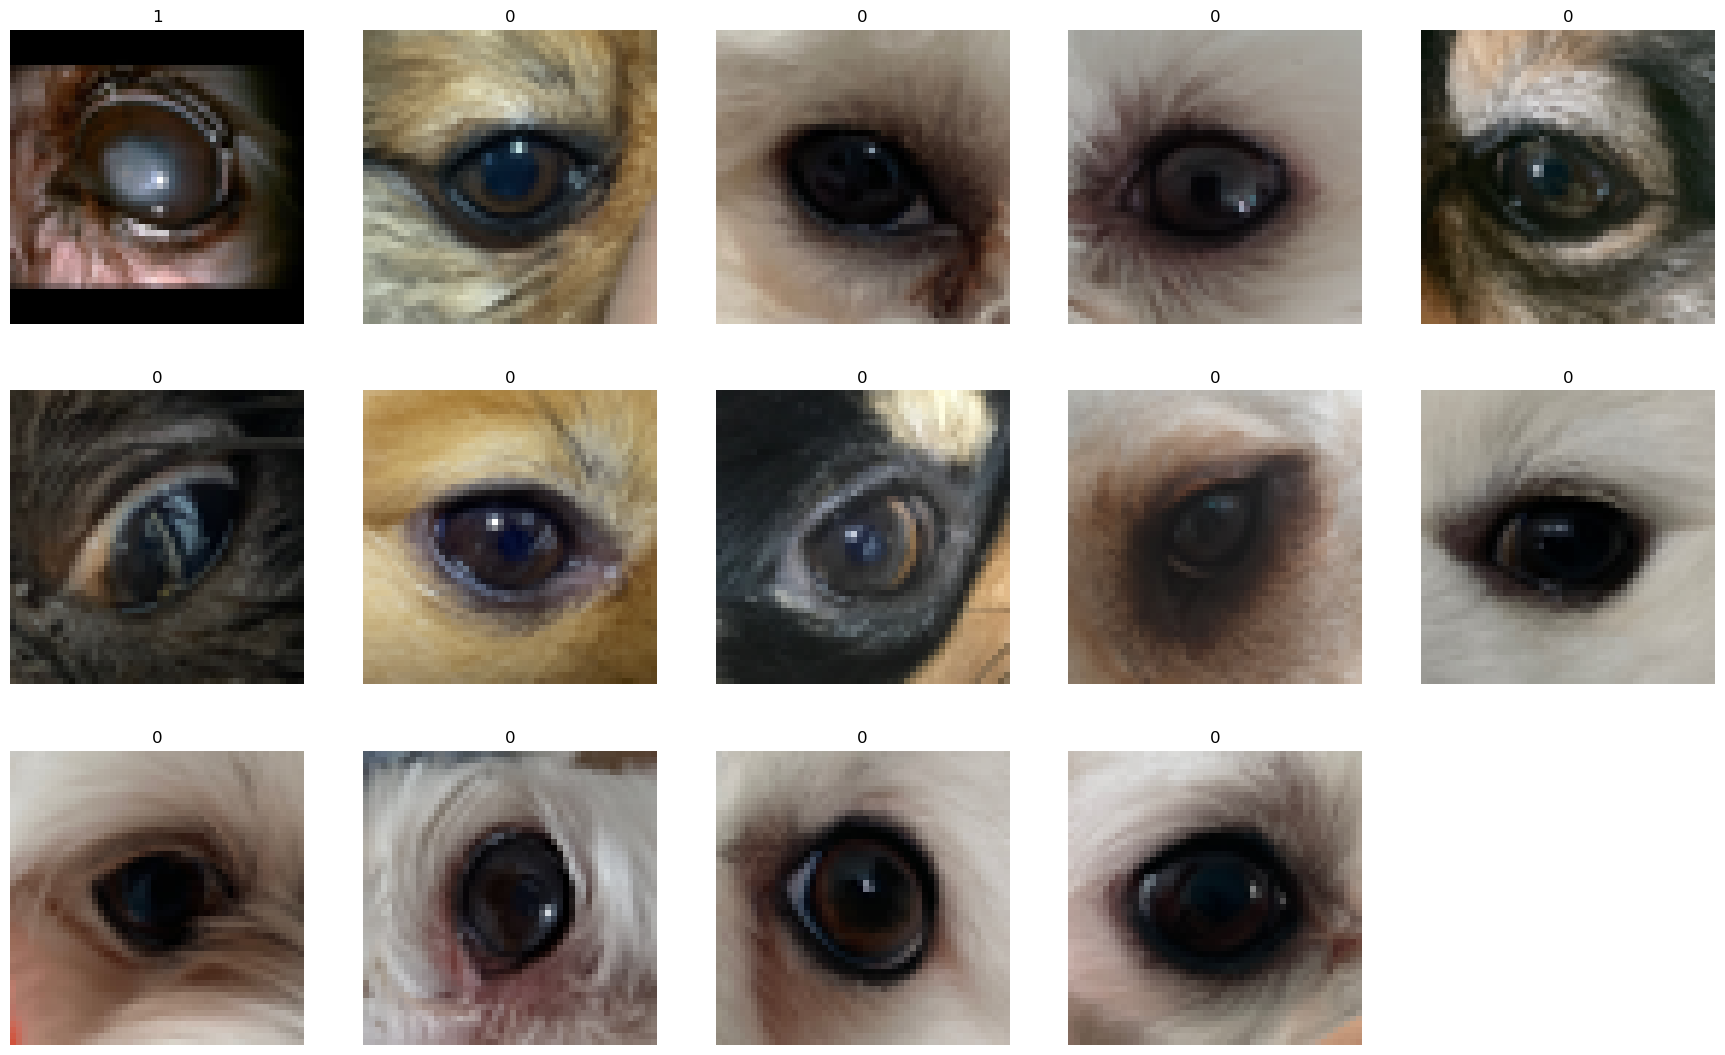

In [20]:
plt.figure(figsize=(22, 32))
for i in range(14):
    plt.subplot(7, 5, i + 1)
    #plt.imshow(np.squeeze(sample_data['image_pixel'][i])) # 이미지 데이터의 차원을 3차원에서 2차원으로 
    plt.imshow(df['image_pixel'][i])  # np.squeeze 안해도 잘 보임
    plt.title(df['path'][i])
    plt.axis("off")
plt.show();

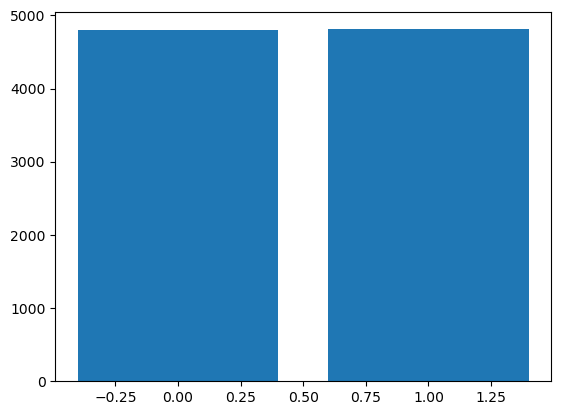

In [21]:
# Extract the x and y values from the groupby count
x_values = [0, 1]
y_values = df.groupby('path').size().values  # Use size() instead of count()

# Plot the bar chart
plt.bar(x_values, y_values)
plt.show()

In [22]:
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path,image_pixel,path
0,요크셔 테리어,16,0,0,안검종양,1,1,1,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_030b3...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,포메라니안,4,0,1,안검종양,0,0,0,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04133...,"[[[106, 101, 77], [105, 99, 76], [111, 106, 83...",0
2,비숑 프리제,1,1,1,안검종양,0,0,0,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04172...,"[[[195, 190, 178], [196, 193, 181], [200, 197,...",0
3,말티즈,0,1,1,안검종양,0,0,0,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_04499...,"[[[168, 169, 164], [162, 162, 157], [160, 159,...",0
4,포메라니안,5,1,0,안검종양,0,0,0,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D0_05bdf...,"[[[9, 18, 9], [9, 19, 10], [25, 31, 23], [43, ...",0
...,...,...,...,...,...,...,...,...,...,...,...
9605,시츄,14,0,0,안검종양,1,1,1,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3b103...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
9606,시츄,14,1,1,안검종양,1,1,1,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3d8b3...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
9607,시츄,14,1,1,안검종양,0,1,1,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db32...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
9608,시츄,11,1,1,안검종양,1,1,1,D:\반려동물 안구질환 데이터\1.Training\안검종양\crop_D9_3db41...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1


In [23]:
# 이미지 데이터를 numpy 형식으로 변환
X_aug = df['image_pixel'].to_numpy()
X_aug = np.stack(X_aug, axis=0)
Y_aug = np.array(df.iloc[:, -1:])
print(X_aug.shape)
print(Y_aug.shape)

(9610, 50, 50, 3)
(9610, 1)


## model

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=3)

In [26]:
X_train.shape

(7688, 50, 50, 3)

In [27]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

In [28]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), input_shape=[50, 50, 3], activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [29]:
def train_model(model, X_train, Y_train, EPOCHS):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
    print("Training model...")
    history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=50,
                        callbacks=[reduce_lr, early_stop])
    return history

In [30]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], name='train_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], name='val_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], name='train_loss'), row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], name='val_loss'), row=1, col=2)
    fig.show()

In [31]:
model = create_model()
history = train_model(model, X_train, Y_train, EPOCHS=50)
plot_model_training_curve(history)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)        

In [32]:
# 전체 데이터에 대한 성능 평가 및 저장
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
model_file = 'Eyelid_Tumor.h5'
model.save(model_file)

Score: loss of 0.005834400653839111; accuracy of 99.73985552787781%


C:\Users\asiae\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



## validation 데이터로 검증

### validation 데이터 전처리

In [36]:
# 데이터프레임 생성
val_df = pd.DataFrame(columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "path", "img_path"])

# 디렉토리 경로
val_directory_paths = [r"D:\반려동물 안구질환 데이터\2.Validation\안검종양"]

# 빈 리스트 생성
val_data_list = []

# 디렉토리 내 JSON 파일 읽기
for directory_path in val_directory_paths:
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                json_data = json.load(file)

                # 데이터프레임 생성을 위한 정보 추출
                breed = json_data["images"]["meta"]["breed"]
                age = json_data["images"]["meta"]["age"]
                gender = json_data["images"]["meta"]["gender"]
                eye_position = json_data["images"]["meta"]["eye_position"]
                lesions = json_data["label"]["label_disease_nm"]
                label_disease_lv_1 = json_data["label"]["label_disease_lv_1"]
                label_disease_lv_2 = json_data["label"]["label_disease_lv_2"]
                label_disease_lv_3 = json_data["label"]["label_disease_lv_3"]
                img_path = os.path.join(directory_path, json_data["label"]["label_filename"])

                # 데이터 리스트에 추가
                val_data_list.append([breed, age, gender, eye_position, lesions, label_disease_lv_1, label_disease_lv_2, label_disease_lv_3, img_path])

In [37]:
# 데이터프레임 생성
val_df = pd.DataFrame(val_data_list, columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "img_path"])
val_df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path
0,미니어처 핀셔,7.0,1.0,왼쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D0_03b...
1,믹스,10.0,0.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D0_03c...
2,닥스훈트,4.0,1.0,오른쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D0_0bf...
3,믹스,4.0,1.0,왼쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D0_0c1...
4,토이 푸들,7.0,0.0,왼쪽눈,안검종양,무,무,무,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D0_0c4...
...,...,...,...,...,...,...,...,...,...
1171,말티즈,5.0,0.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D9_355...
1172,페키니즈,15.0,0.0,왼쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D9_355...
1173,말티즈,15.0,0.0,오른쪽눈,안검종양,유,유,유,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D9_355...
1174,오스트레일리언 실키 테리어,15.0,0.0,오른쪽눈,안검종양,무,유,유,D:\반려동물 안구질환 데이터\2.Validation\안검종양\crop_D9_3dc...


In [38]:
# 확장자 없는 애 찾기
val_img_path_list = list(val_df['img_path'])

no_file=0
for idx, img_path in enumerate(val_img_path_list):
    if os.path.exists(img_path):
        pass
        # print(f"File exists: {img_path}")
    else:
        print(idx)
        no_file += 1
        print(f"File does not exist: {img_path}")
        
print(no_file)

0


In [39]:
# 이미지 데이터 사이즈 변경
import numpy as np
val_df['image_pixel'] = val_df['img_path'].map(lambda x: np.asarray(Image.open(x).resize((50,50))))

# Define a function to map values to 0 or 1
def map_to_binary(value):
    return 0 if value == '무' else 1

# Apply the function to the specified columns
columns_to_map = ['label_disease_lv_1', 'label_disease_lv_2', 'label_disease_lv_3']
for column in columns_to_map:
    val_df[column] = val_df[column].apply(lambda x: map_to_binary(x))

# Print unique values to verify the transformation
for column in columns_to_map:
    print(val_df[column].unique())

def check_disease_presence(row):
    if row['label_disease_lv_1'] == 0 and row['label_disease_lv_2'] == 0 and row['label_disease_lv_3'] == 0:
        return 0
    else:
        return 1

val_df['path'] = val_df.apply(check_disease_presence, axis=1)

print(val_df['path'].unique())

[0 1]
[0 1]
[0 1]
[0 1]


In [40]:
# 1. 모델 불러오기
from keras.models import load_model
model = load_model('Eyelid_Tumor.h5')

# 2. 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# 3. Evaluate the model on the test data
loss, accuracy = model.evaluate(X_aug, Y_aug, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.005196868907660246
Test Accuracy: 0.9989594221115112
